### Uma vez que a tabela gerada pelo Spark está salva no HDFS ou S3 podemos ler com python 
* ETL ---> Spark (PySpark)
* Análise exploratória, modelagem/Analytics ----> Python (Pandas, Scikitlearn, etc)

#### Importando Biblioteca de Funções Turing Lab e Turing IA

In [1]:
%run -i '/home/.Turing/TuringCredentialsAccess.py3'
%run -i '/home/.Turing/TuringLabFunctions.py3'

------------- Turing Lab Data Science --------------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 28/07/2019 -------------------------------
----------------------------------------------------------
--- Consulte o manual de Biblioteca de Funções Turing: ---


----------------------------------------------------------


#### Mapear bibliotecas Python necessárias

In [4]:
import pandas as pd
import numpy as np

#### Gerando credenciais de acesso para lake

In [5]:
id_empresa = '1022'
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)

#### Lendo tabela gerada pelo ETL (PysPark)

In [7]:
nm_bucket = 'turing-bkt-treinamentos'
path_file = 'Treinamento/ETL/BrunoJ/ABT_CLI_EMP_PAG'
df_00 = TuringReadParquetFile(S3fs,nm_bucket,path_file)
df_00.shape

(25, 10)

In [8]:
df_00.head()

,PK_ID,VL_SCORE,VL_RENDA,QT_DIAS_JOINED_NOW,QT_EMP_HOME,QT_EMP_CRED,VL_MED_MISSED,VL_MED_REPAID,PK_DATREF,PK_DATPROC
0,35214,696,95849,5852,93,21,0.51,0.39,20190816,2019-08-16T17:58:04
1,44601,518,156341,5413,47,58,0.46,0.73,20190816,2019-08-16T17:58:04
2,26945,806,214516,6837,30,43,0.51,0.34,20190816,2019-08-16T17:58:04
3,49545,770,104564,4293,49,41,0.58,0.59,20190816,2019-08-16T17:58:04
4,49624,800,49036,2568,24,35,0.47,0.62,20190816,2019-08-16T17:58:04


#### Análise de Missings

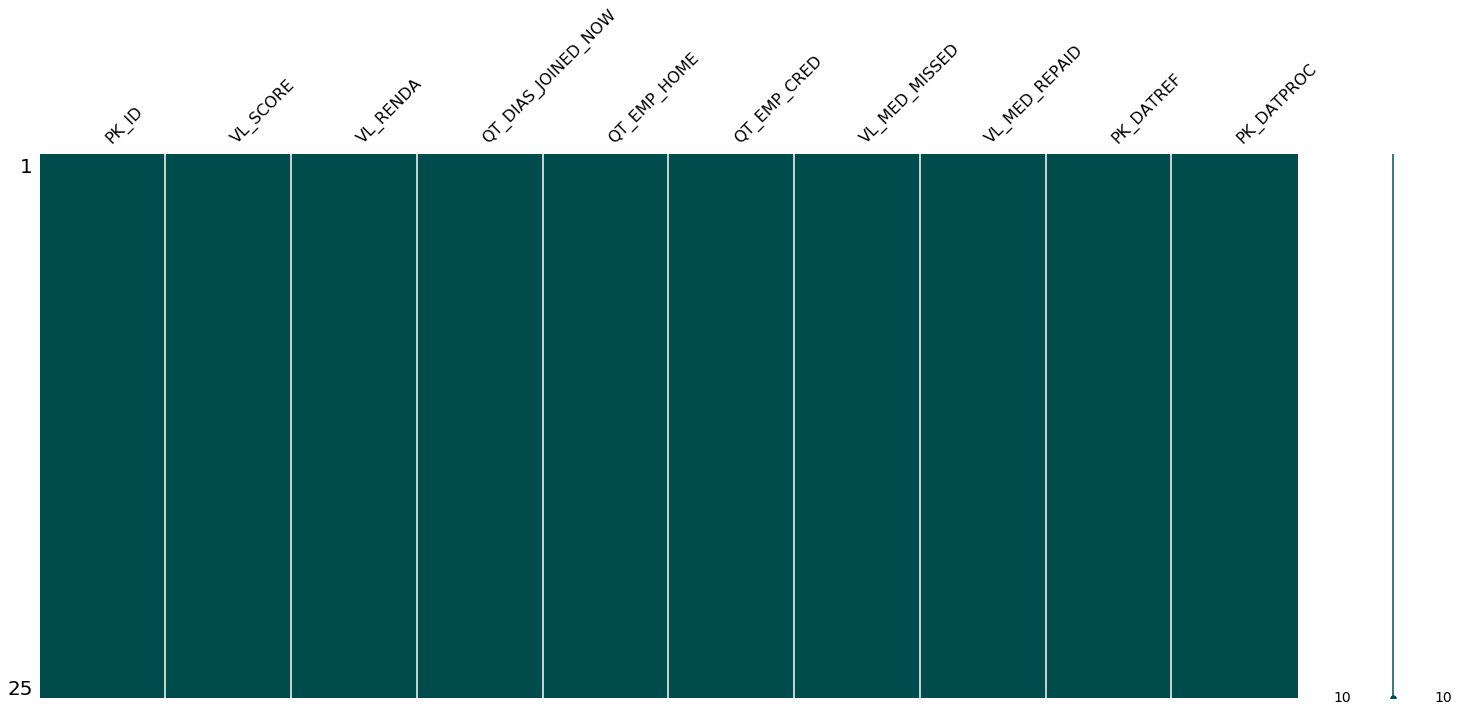

In [10]:
TuringMissingPlot(df_00)

#### Correlação de Pearson

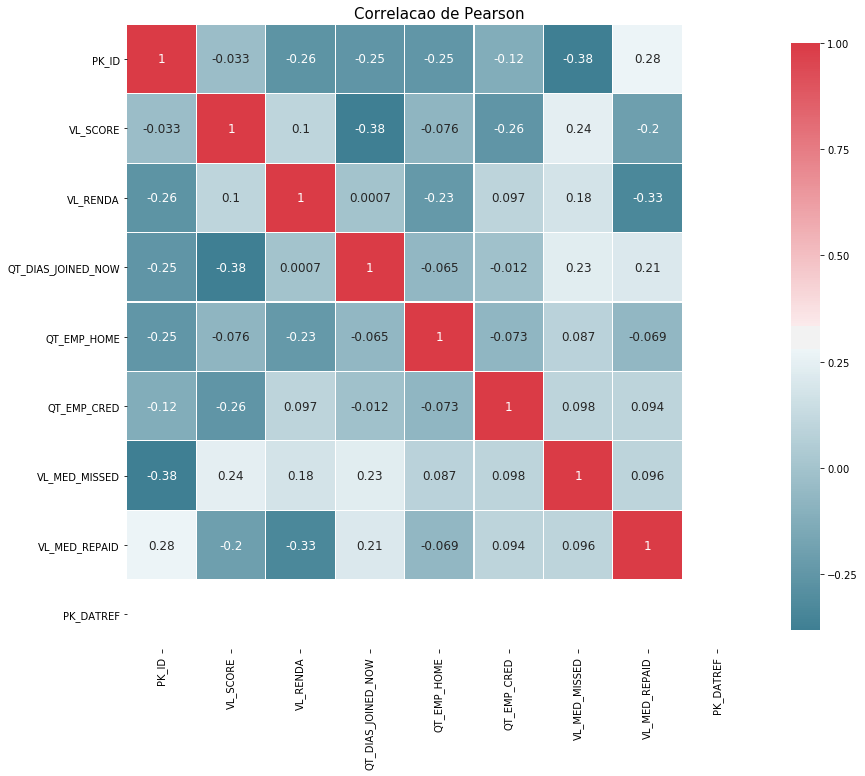

In [11]:
TuringPearsonCorr(df_00)

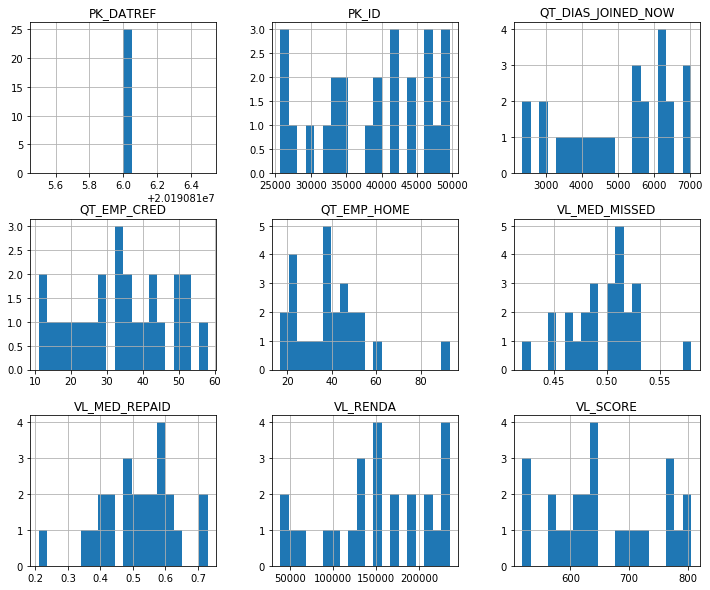

In [12]:
TuringHistogram(df_00)  

#### BoxPlot

In [13]:
lista_boxplot = ['QT_DIAS_JOINED_NOW']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [14]:
lista_boxplot = df_00.drop(['PK_DATPROC','PK_DATREF','PK_ID','VL_RENDA'],axis=1).columns

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [15]:
lista_boxplot = ['QT_EMP_CRED','QT_EMP_HOME']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [16]:
lista_boxplot = ['VL_MED_MISSED','VL_MED_REPAID']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

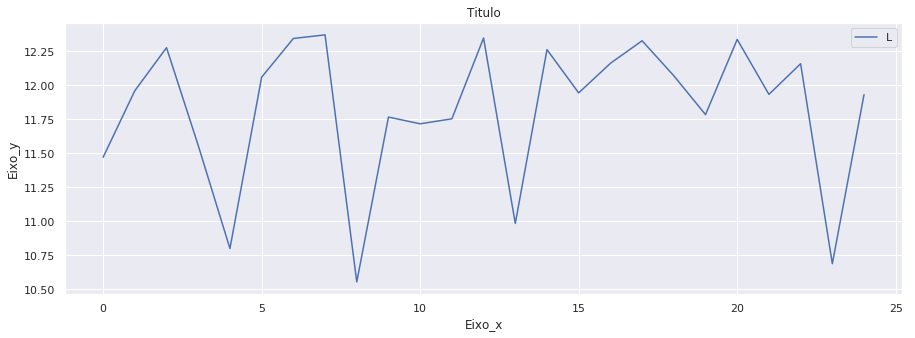

'TuringLinePlot'

In [24]:
TuringLinePlot(df_00,None,'VL_RENDA',5,15,'Eixo_x','Eixo_y','Titulo','Legenda')

Turing Visualização de Dados - PairPlot


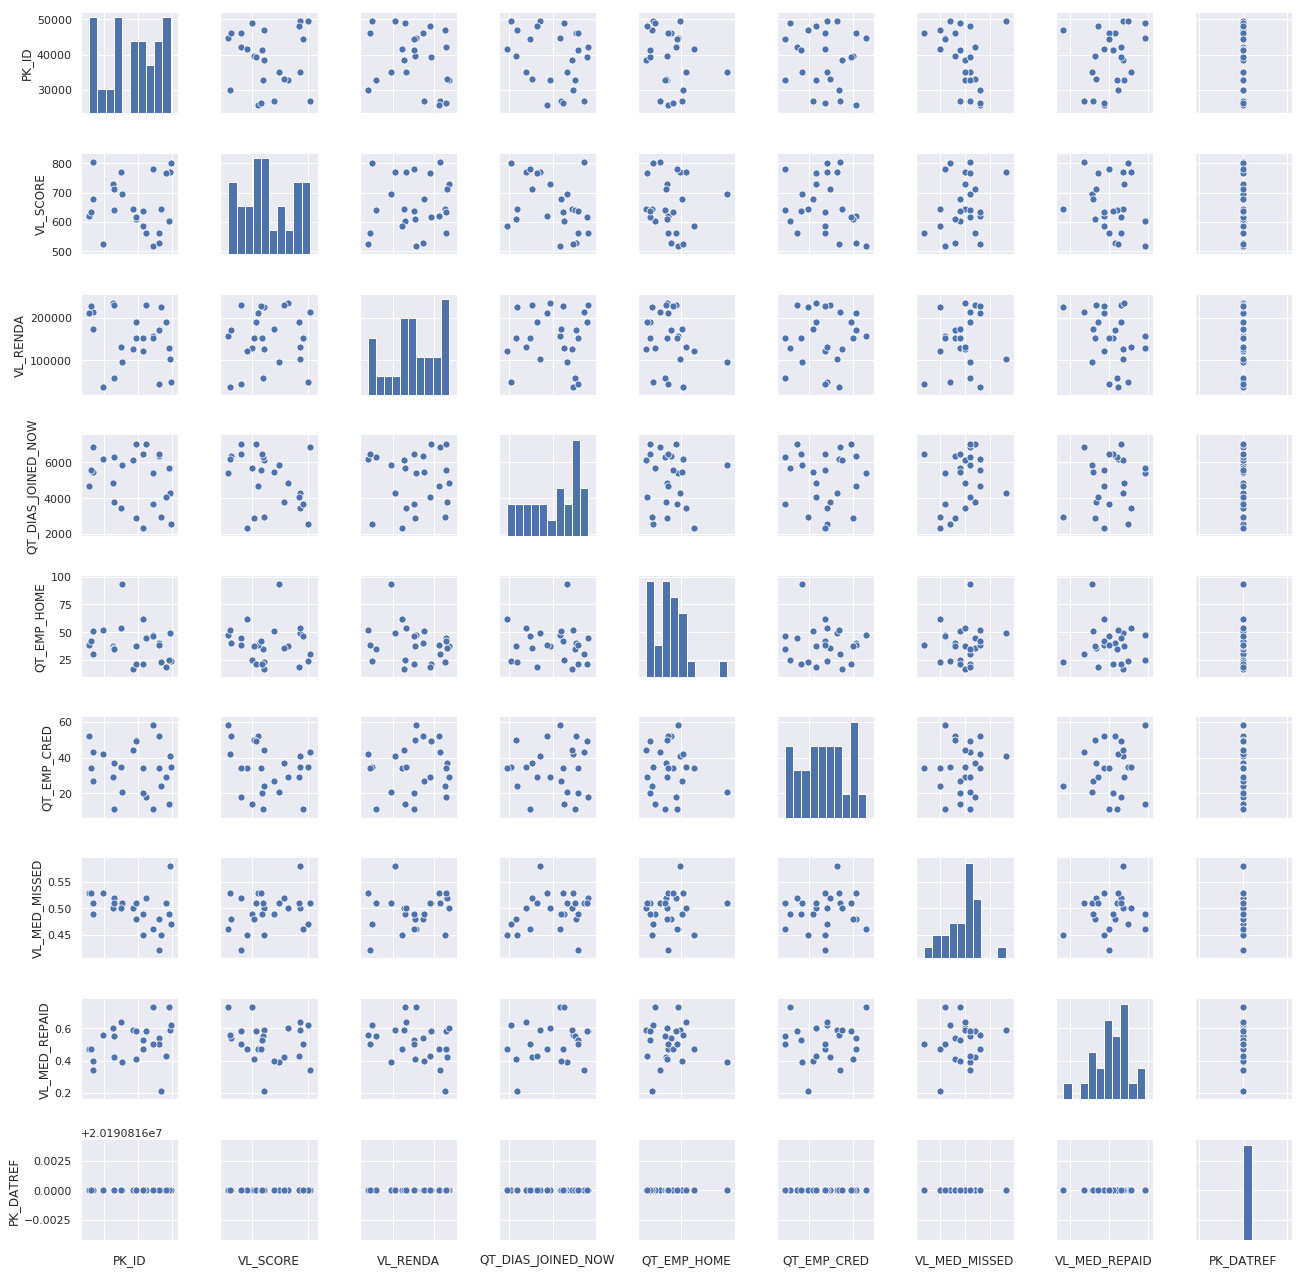

In [18]:
TuringDVPairPlot(df_00,sizegraph=2,plot_s = 50)

#### TuringNormalProbPlot()
Esta função gera um gráfico de probabilidade dos dados em relação aos quantis de uma distribuição teórica específica 
(a distribuição normal por padrão). 
O Probplot possivelmente calcula uma linha de melhor ajuste para dados e plota os resultados usando o Matplotlib ou uma determinada função de plotagem.

'TuringNormalProbPlot'

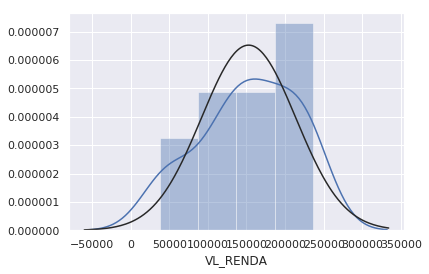

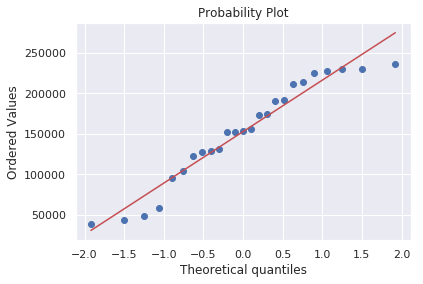

In [19]:
TuringNormalProbPlot(df_00,'VL_RENDA')

In [20]:
#Aplicando transformação log na variável 
df_00['VL_RENDA'] = np.log(df_00['VL_RENDA'])

'TuringNormalProbPlot'

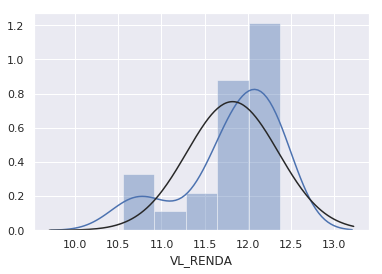

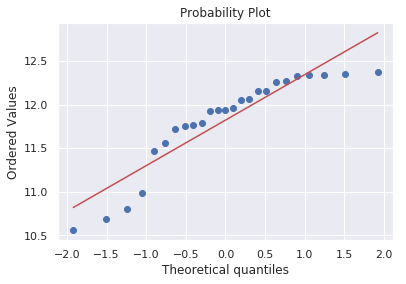

In [21]:
TuringNormalProbPlot(df_00,'VL_RENDA')

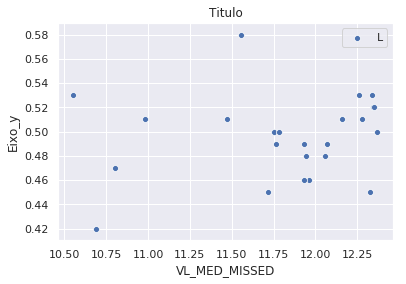

'TuringScatterPlot'

In [30]:
TuringScatterPlot(df_00,'VL_RENDA','VL_MED_MISSED',5,15,'VL_MED_MISSED','Eixo_y','Titulo','L')

### Salvar Tabela para AutoML - Turing IA

In [27]:
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'FLAT_TABLES/'
nm_s3_file = 'BJ_ABT01_20190816.csv'
TuringWriteS3File(df_00,path_s3_wfile,nm_s3_file,S3fs,delimiter=',')

'written successfully'

### Verifique se a tabela está disponível para Analytics no TuringLab